In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))

In [20]:
#ls

In [2]:
import numpy as np
from structure_factor.structure_factor import StructureFactor, SymmetricFourierTransform


In [3]:
import pickle
with open('/Users/dhawat/github/structure-factor/data/data_big_intensity.dat', 'rb') as pickle_file:
    r_pois_2, n_pois_2, pois_2, push_2, equi_2, t_max, t_max_e = pickle.load(pickle_file, encoding="bytes")

import pickle
with open('/Users/dhawat/github/structure-factor/data/big_data_wit_tmaxe15.dat', 'rb') as pickle_file:
    r_pois, n_pois_1, pois_1, push_1, equi_1, r_vec_1, v_pois_1, v_push_1, v_equi_1, t_max, t_max_e = pickle.load(pickle_file, encoding="bytes")
with open('/Users/dhawat/github/structure-factor/data/big_gin_1.dat', 'rb') as pickle_file_2:
    n_gin, gin = pickle.load(pickle_file_2, encoding="bytes")

In [4]:

my_data_pois = np.array([np.array(np.real(pois_1)).reshape(-1,), np.array(np.imag(pois_1)).reshape(-1,)]).T
my_data_equi = np.array([np.array(np.real(equi_1)).reshape(-1,), np.array(np.imag(equi_1)).reshape(-1,)]).T
my_data_push = np.array([np.array(np.real(push_1)).reshape(-1,), np.array(np.imag(push_1)).reshape(-1,)]).T
my_data_gin = np.array([np.array(np.real(gin)).reshape(-1,), np.array(np.imag(gin)).reshape(-1,)]).T

#data_equi = StructureFactor(my_data_equi)
#data_pois = StructureFactor(my_data_pois)
#data_push = StructureFactor(my_data_push)


/opt/anaconda3/envs/these_project/lib/python3.8/site-packages/rpy2/robjects/vectors.py:980: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".
  warnings.warn('R object inheriting from "POSIXct" but without '
R[write to console]: number of data points exceeds 3000 - computing border correction estimate only

The reliable minimum wavelength is : 1.2566370614359172


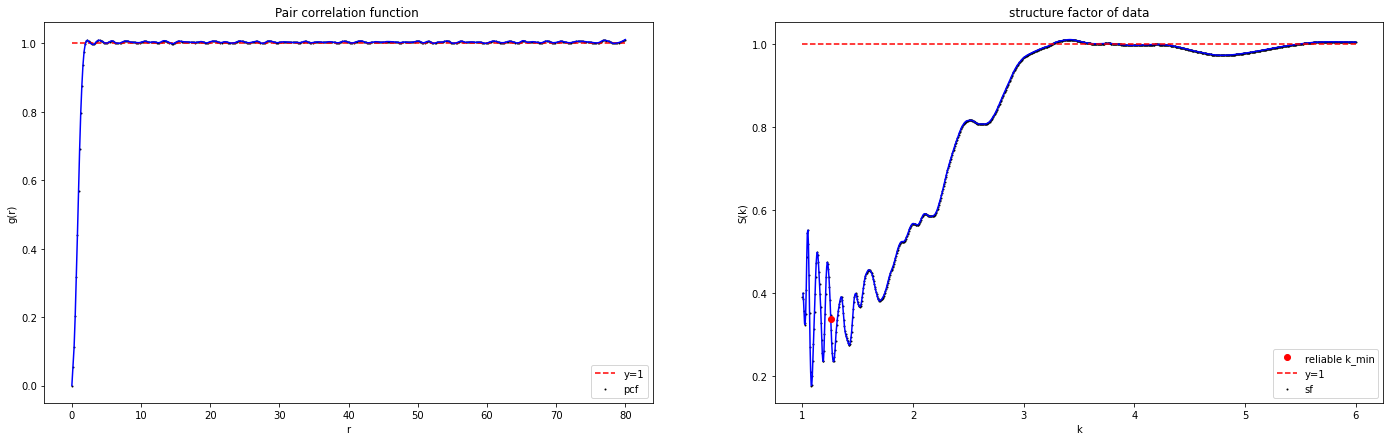

In [5]:
data_gin = StructureFactor(my_data_gin, intensity = 1/np.pi )
r_vec = np.linspace(0,80, 500)
approx_pcf_gin = data_gin.get_pcf_estimate(100, 'fv', 'd', r_vec = r_vec, spar_=0.2 )
wave_lengh = np.linspace(1, 6, 1000 )
approx_sf_gin, k_min = data_gin.get_fourier_estimate('pcf','estimation_2',  k= wave_lengh, N = 160)

In [6]:
my_data_equi2 = np.array([np.array(np.real(equi_2)).reshape(-1,), np.array(np.imag(equi_2)).reshape(-1,)]).T
data_equi2 = StructureFactor(my_data_equi2, intensity = 1/np.pi )
#r_vec = np.linspace(0,100, 500)
approx_pcf_equi2 = data_equi2.get_pcf_estimate(radius=200, args='ppp', correction_="best" )


/opt/anaconda3/envs/these_project/lib/python3.8/site-packages/rpy2/robjects/vectors.py:980: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".
  warnings.warn('R object inheriting from "POSIXct" but without '


The reliable minimum wavelength is : 3.1772414814151793


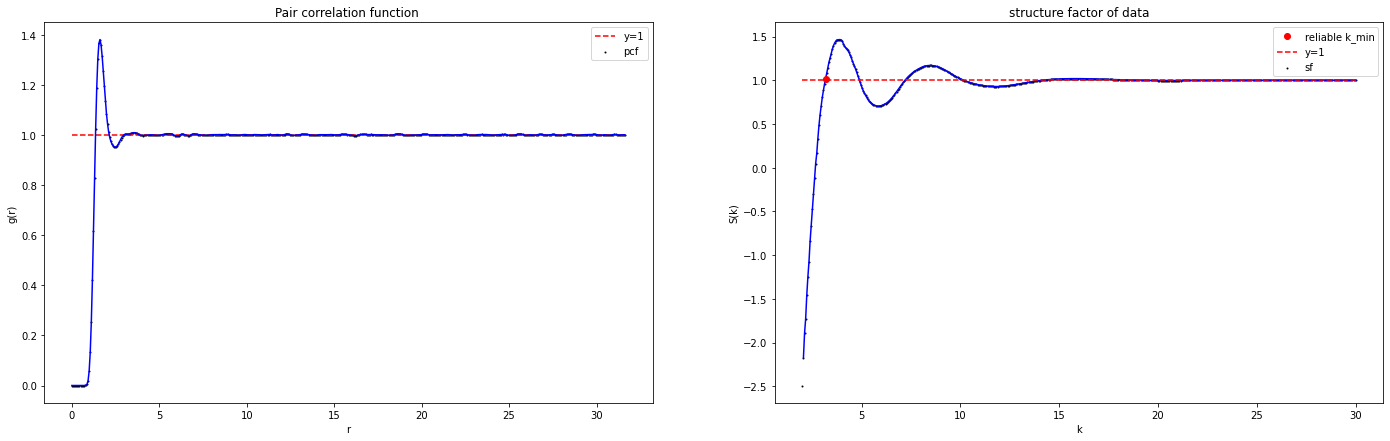

In [7]:

wave_lengh = np.linspace(2, 30, 500 )
approx_sf_equi2, k_min_equi2 = data_equi2.get_fourier_estimate('iso','estimation_2', k= wave_lengh, h=0.1, N = 1000)

The reliable minimum wavelength is : 3.1772414814151793


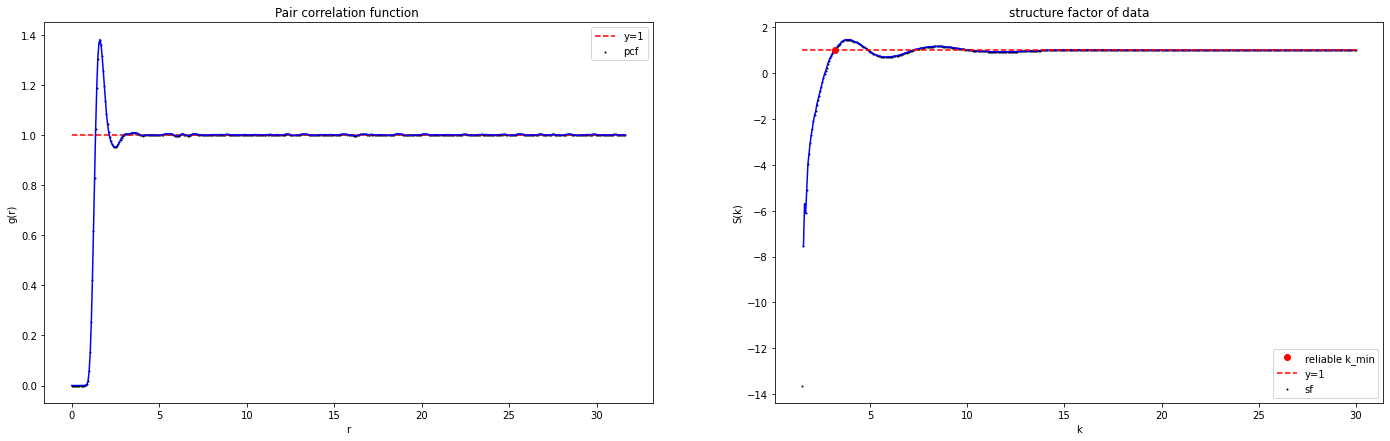

In [15]:

wave_lengh = np.linspace(1.5, 30, 500 )
approx_sf_equi2, k_min_equi2 = data_equi2.get_fourier_estimate('iso','estimation_2', h=0.1, k= wave_lengh, N = 1000)

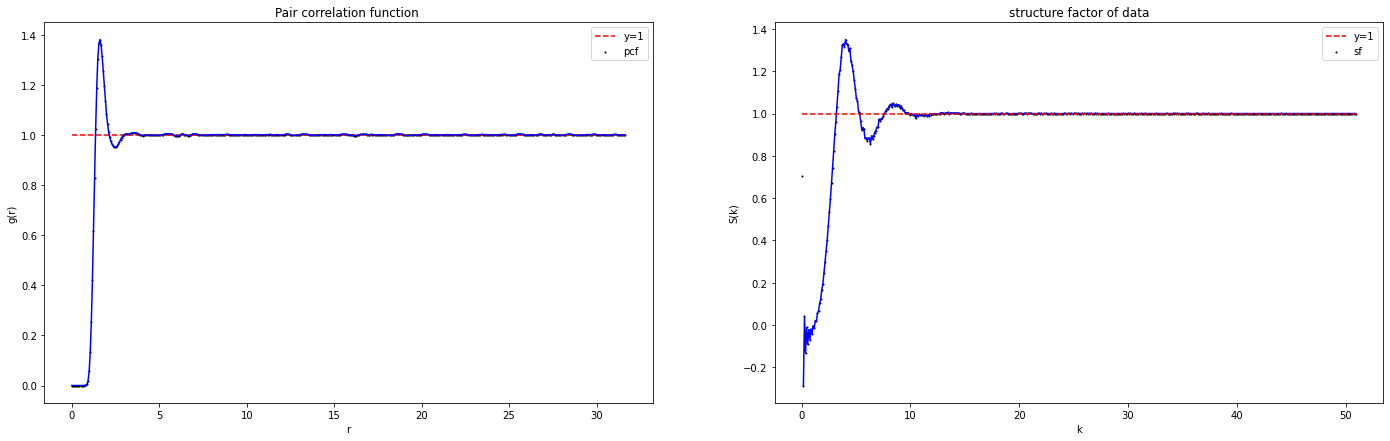

In [16]:

sf_2_equi = data_equi2.get_fourier_estimate('iso','estimation_1')

In [ ]:
L_ = 640
x_pois = np.real(pois_2)
y_pois = np.imag(pois_2)
index_sq_pois = np.logical_and((np.abs(x_pois) < L_) , (np.abs(y_pois) < L_))
x_pois_sq = x_pois[index_sq_pois]
y_pois_sq = y_pois[index_sq_pois]

my_data_pois_rec = np.array([np.array(x_pois_sq).reshape(-1,), np.array(y_pois_sq).reshape(-1,)]).T
data_pois_sq = StructureFactor(my_data_pois_rec, intensity = 1/np.pi )

norm_k_pois_sq, sc_pois_sq = data_pois_sq.get_scattering_intensity_estimate(L = 2*L_, max_k = 1001 , arg="1D")



In [ ]:
data_pois_sq.plot_scattering_intensity_estimate(arg="plot")

In [21]:
norm_k_pois_sq, sc_pois_sq = data_pois_sq.get_scattering_intensity_estimate(L = 2*L_, max_k = 100, n_k=100 , arg="2D")
data_pois_sq.plot_scattering_intensity_estimate(arg="all")

KeyboardInterrupt: 